In [1]:
# 스크래핑을 하기 위해서는, 사이트의 특정을 파악해야함

In [2]:
# 뽐뿌
# html4.1

In [ ]:
# 팁:
1) 페이지를 변경해서 바뀌는 부분을 확인한다. - urlpath, 

In [40]:
from requests import request

url = "https://www.ppomppu.co.kr/zboard/zboard.php"
params = {
    'id':'freeboard',
    'page':1
}

resp = request('GET',url, params=params)

In [41]:
resp.headers['content-type']

'text/html; charset=euc-kr'

In [42]:
type(resp.text)

str

In [43]:
# resp.content == resp.text.encode('euc-kr')
resp.text.encode('euc-kr').decode('utf8',errors='ignore')

UnicodeEncodeError: 'euc_kr' codec can't encode character '\ufffd' in position 56063: illegal multibyte sequence

In [15]:
from bs4 import BeautifulSoup

dom = BeautifulSoup(resp.text, 'html.parser')

In [17]:
from requests.compat import urljoin
for tag in dom.select('#revolution_main_tabel tr#headNotice ~ tr > td:nth-child(3)'):
    print(urljoin(url, tag.attrs['href']))

0

In [18]:
# 댓글 가져오기

In [52]:
resp = request('GET','https://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=2&divpage=1623&no=8711399')

In [53]:
resp.headers['Content-type']

'text/html; charset=euc-kr'

In [54]:
dom = BeautifulSoup(resp.text, 'lxml')
                                # html.parser => 파서마다 결과가 다름
                                # html5lib

In [56]:
dom.select('table table table > tr:first-child > :first-child') # 클래스나 아이디가 일정하지 않다면, 구조를 보고

[<td align="left" class="board-contents" valign="top">
 <p> </p>
 <p> </p>
 <p>크루전은 아직도 진조크루가 강력하네요</p>
 <p> </p>
 <p> </p>
 <p>
 <img alt="20240319094243_FQLwNUQnBL.jpg" data-css_width="600" src="//cdn2.ppomppu.co.kr/zboard/data3/2024/0319/20240319094243_FQLwNUQnBL.jpg" style="width: 600px; height: auto; max-width:900px;"/>
 </p>
 <p> </p>
 <p> </p>
 <p>
 <span style="font-family: '맑은 고딕', 'Malgun Gothic', 돋움, dotum, sans-serif; font-size: 17px;">비보이팀 '진조크루'(SKT)가 '세계브레이킹대회 언디스퓨티드' 5대 5 배틀에서 우승했다.</span><br style="font-family: '맑은 고딕', 'Malgun Gothic', 돋움, dotum, sans-serif; font-size: 17px;"/><br style="font-family: '맑은 고딕', 'Malgun Gothic', 돋움, dotum, sans-serif; font-size: 17px;"/><span style="font-family: '맑은 고딕', 'Malgun Gothic', 돋움, dotum, sans-serif; font-size: 17px;">18일 진조크루 측에 따르면, 이 팀은 전날 일본 도쿄에서 열린 해당 대회 '토너먼트 결승'에서 1위를 차지했다. 4강전에서 일본 '바디카니발+1'을 5대 0으로 물리친 후 결승전에서 '바디카니발 2'와 겨뤄 이 같은 성과를 얻었다.</span><br style="font-family: '맑은 고딕', 'Malgun Gothic', 돋움, dotum, sans-serif; fon

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="PPOMPPU CO." name="author"/>
<meta content="쇼핑몰핫딜, 쿠폰 및 이벤트, 사용기, 휴대폰 등 쇼핑 정보 제공" name="description"/>
<meta content="" name="keywords"/>
<script src="https://www.googleoptimize.com/optimize.js?id=OPT-N6TJ7LN"></script>
<script async="async" src="//www.googletagservices.com/tag/js/gpt.js"></script>
<script>var googletag = googletag || {};googletag.cmd = googletag.cmd || [];var display_googletags = display_googletags || [];</script>
<meta content="https://www.ppomppu.co.kr/images/icon_app_20160427.png" property="og:image"/>
<meta content="뽐뿌" property="og:site_name"/>
<title>뽐뿌 - 자유게시판</title>

In [68]:
# AJAX
# CSR, 클라이언트 렌더링
# 이때 바뀐 내용을 우리가 어떻게 알 수 있는가? 

url = "https://pythonscraping.com/pages/javascript/ajaxDemo.html"
resp = request('GET',url)

In [69]:
print(resp.text)  # 뒷단에서 XHR이 돌아간것이다. 

<html>
<head>
<title>Some JavaScript-loaded content</title>
<script src="../js/jquery-2.1.1.min.js"></script>

</head>
<body>
<div id="content">
This is some content that will appear on the page while it's loading. You don't care about scraping this.
</div>

<script>
$.ajax({
    type: "GET",
    url: "loadedContent.php",
    success: function(response){

	setTimeout(function() {
	    $('#content').html(response);
	}, 2000);
    }
  });

function ajax_delay(str){
 setTimeout("str",2000);
}
</script>
</body>
</html>


In [70]:
dom = BeautifulSoup(resp.text, 'lxml')

In [71]:
# $ - jQuery
# $.ajax - 자바스크립트 실행하라는 의미
# 셀레니움 - 쓰지마라. 느리다. 수집 용도가 아니라, 웹페이지 테스트 용도이다. - 브라우저와 동일하다. 속도가 느리다.

In [72]:
import re
re.search(r'^\s*url\s*:\s*[\'\"]?(.+)[\'\"]?,?$', dom.body.script.text, re.MULTILINE).group(1)

'loadedContent.php",'

In [81]:
from requests.compat import urljoin
from requests import request

url = urljoin(resp.resquest.url, 'loadedContent.php')
resp = request('GET', url)
resp.text

AttributeError: 'Response' object has no attribute 'resquest'

In [82]:
## 브런치

In [84]:
url = "https://brunch.co.kr/search?q=수지"
resp = request('GET', url)
dom = BeautifulSoup(resp.text, 'html.parser')

In [85]:
dom.find_all(string=re.compile('수지'))

['브런치스토리 글 검색: 수지']

In [ ]:
# Fetch/XHR 의 responsem header 보기,Initiator 보면 요청 콜스택 확ㅇ니

In [89]:
dom.select('form[action]')[0]

<form action="/search" method="get">
<input autocomplete="off" id="searchQuery" name="q" placeholder="검색어를 입력해 주세요" title="검색어입력" type="text" value="수지"/>
<input name="profileId" type="hidden" value=""/>
</form>

In [ ]:
<form action="/search" method="get">
# 폼 안의 것들이 다 파라메터이다.
<input autocomplete="off" id="searchQuery" name="q" placeholder="검색어를 입력해 주세요" title="검색어입력" type="text" value="수지"/>
<input name="profileId" type="hidden" value=""/>
</form>

In [90]:
for tag in dom.select('form[action] input[name]'):
    print(tag.attrs['name'], tag.attrs['value'])

q 수지
profileId 
q 수지
type article


In [105]:
url = 'https://api.brunch.co.kr/v1/search/article'
params = {
    'q':'황정민',
    'page': 2,
    'pageSize': 20,
    'highlighter': 'y',
    'escape': 'd',
    'sortBy': 'recency'
}

resp = request("GET", url, params=params)

In [106]:
resp.status_code, resp.reason, resp.headers, resp.request.headers

(200,
 '',
 {'Date': 'Tue, 19 Mar 2024 02:11:52 GMT', 'Content-Type': 'application/json;charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Cache-Control': 'no-cache, no-store, must-revalidate, no-store', 'Pragma': 'no-cache', 'Expires': 'Thu, 01 Jan 1970 00:00:00 GMT', 'Access-Control-Allow-Methods': 'GET,POST,HEAD,OPTIONS,PUT,DELETE', 'Access-Control-Allow-Headers': 'Content-Type,X-Requested-With,accept,Origin,Access-Control-Request-Method,Access-Control-Request-Headers,brunch-client-os,X-CSRF-TOKEN,X-JSESSIONID,referer,brunch-agent', 'Access-Control-Allow-Credentials': 'true', 'Set-Cookie': 'bid=""; Domain=.brunch.co.kr; Expires=Thu, 01-Jan-1970 00:00:10 GMT; Path=/; Secure', 'Content-Language': 'en-US', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'Content-Encoding': 'gzip'},
 {'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'})

In [107]:
for it in resp.json()['data']['list']:
    print(it['title'])

“커피 줘야지, 서늘한 바람에 슬픔이 묻어있으니” - [밤9시의 커피] 홉스봄의 혁명과 재즈가 흐른 겨울밤
<데드맨>, 조진웅도 죽은 건 살릴 수 없다
광고의 세계 - 심오하지
시민덕희 2부
<먹고사는 게 전부가 아닌 날도 있어서> (서평)
서로 다른 서울의 두 가지 풍경 - -<서울의 봄>과 <싱글 인 서울>
사는 것이 초콜릿보다 달콤하다는 것 - 하루 한 줄, 하루 한 대사
혼돈 - 내면 작업 11
당신의 이야기는 그리 재미있지 않다? - 나의 망생일지
나는 왜 나를 함부로 대할까 - 자기돌봄이 필요한 그대에게
이래서 경력자... 경력자.. 하나 봅니다.
어둠 속에 있던 망자 - 그곳에 사람이 있었다.
[짧은 영화리뷰]<어른 김장하>(강추),<서울의 봄> - 샛별BOOK연구소
유진 스미스처럼
아이들은 요리를 배우며 성장하고 난 아이들을 보며 큰다 - 산천 요리생 마지막이 아니길
극장에서, 1979년 12월로 - <서울의 봄> 김성수, 2023
January, 2024
YMCA 야구단: 하늘에서 내려올 ‘공’을 기다리며
정보는 디테일해야 힘을 갖는다
초보 관리자의 이미지 메이킹 1


In [108]:
url = 'https://brunch.co.kr/'
resp = request('GET', url)
dom = BeautifulSoup(resp.text, 'html.parser')

In [109]:
dom.select('form')

[<form action="/search" method="get">
 <input autocomplete="off" id="searchQuery" name="q" placeholder="검색어를 입력해 주세요" title="검색어입력" type="text" value=""/>
 <input name="profileId" type="hidden" value=""/>
 </form>]

In [115]:
url = "https://api.brunch.co.kr/v1/search/live"
params = {
    'q' : '황정민'
}

resp = request('GET', url, params=params)
resp.status_code, resp.headers['content-type']

(200, 'application/json;charset=UTF-8')

In [116]:
list(map(lambda r:r['title'], resp.json()['data']['article']))

['다시, 봄을 기다리며 &#39;서울의 봄&#39; - 김성수 감독, 정우성·<b>황정민</b> 주연 영화 &#39;서울의 봄&#39; 리뷰',
 '&#34;야 근데 <b>황정민</b>이 전두환이야?&#34; - &lt;서울의 봄&gt;과 타란티노',
 '류승범과 <b>황정민</b>을 상상하며 만들어 보는 캐릭터 - 합작 / 민정환 &amp; 변승류',
 '영화 리뷰-《서울의 봄》 - 한국 영화 / 감독 김성수-<b>황정민</b>, 정우성 / 141분',
 '&#39;전두광&#39;으로 변신한 <b>황정민</b>, 머리만큼 빛난 연기력',
 '&#34;교섭&#34;과 &#34;유령&#34;, <b>황정민</b>과 설경구',
 '[넷플릭스] 수리남 (2022) - 속고 속이는 목숨 건 심리전 (윤종빈 감독/하정우/<b>황정민</b>/박해수/조우진)']

In [150]:
## 네이버
url = "https://ac.search.naver.com/nx/ac"
params = {
    'q':'groot',
    'con':0,
    'frm':'nv',
    'ans':2,
    'r_format':'json',
    'r_enc':'UTF-8',
    'r_unicode':0,
    't_koreng':1,
    'run':2,
    'rev':4,
    'q_enc':'UTF-8',
    'st':100,
    # '_callback':'_jsonp_34'  # 이거 왜 있는거지? # 콜백함수 이름이다. 
                               # 이렇게 콜백을 붙여야 이벤트 driven하게 만들수 있다.
                               # 자바스크립트는 이벤트를 고려해서 코드를 작성하고 이해해야한다. 
}

resp = request('GET', url, params=params)
resp.status_code, resp.headers['content-type']
resp.json()['items'][0]
list(map(lambda r:r[0], resp.json()['items'][0]))


['groot',
 'Groot Akris Tafeltennis Toernooi',
 'Groot Alfadoku',
 'Groot Constantia',
 'Groot Constantia 2004',
 'Groot Mengdoku',
 'Groot Slem en andere verhalen',
 'Groot Vet Olifantboude',
 "Groot Walenburg's Vuilharmonisch Orkest",
 'Groot is de liefde']

In [151]:
# 403에러가 나면 User-agent 확인

In [ ]:
# 404에러가 나면 경로 확인

In [154]:
# 웹툰 페이지
url = "https://comic.naver.com/webtoon"
resp = request('GET', url)
dom = BeautifulSoup(resp.text,'html.parser')
dom


<!DOCTYPE html>

<html lang="ko">
<head>
<title>네이버 웹툰</title>
<link href="https://ssl.pstatic.net/static/m/comic/im/favicon/1804/webtoon_favicon_32x32.ico" rel="shortcut icon" type="image/x-icon"/>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="article" property="og:type"/>
<meta content="네이버 웹툰" property="og:article:author"/>
<meta content="https://comic.naver.com" property="og:article:author:url"/>
<meta content="네이버 웹툰" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/comic/images/og_tag_v2.png" property="og:image"/>
<meta content="매일매일 새로운 재미, 네이버 웹툰." property="og:description"/>
<script>
		if (/MSIE \d|Trident.*rv:/.test(navigator.userAgent)) {
			window.location = 'microsoft-edge:' + window.location;
			setTimeout(function () {
				window.location = 'https://go.microsoft.com/fwlink/?linkid=2135547';
			}, 1);
		}
	</script>
<script async="" src="https://ssl.pstatic.net/tveta/libs/glad/prod/gfp-core.js"></script>


In [167]:
url = "https://comic.naver.com/webtoon"
params = {
    'week':'mon',
    'order':'user'
}

params['week'] = 'tue'

resp = request('GET', url, params=params)
resp.status_code, resp.headers['content-type']

for node in resp.json()['titleList']:
    print(node['titleId'], node['titleName'])

JSONDecodeError: Expecting value: line 5 column 1 (char 4)

In [166]:
wurl = "https://comic.naver.com/api/webtoon/list?titleId={}&tab={}".format(
    resp.json()['titleList'][2]['titleId'], params['week']
)

KeyError: 'titleList'

In [169]:
url2 = "https://comic.naver.com/webtoon/detail?titleId=814543&page=1"
resp = request('GET', url2)
resp.headers['content-type']

'text/html;charset=UTF-8'

In [175]:
url2 = "https://comic.naver.com/webtoon/detail?titleId=814543&no=32&week=tue"
resp = request('GET', url2)
resp.text, resp.headers['content-type']
dom = BeautifulSoup(resp.text, 'html.parser')
dom.select('#sectionContWide > img[src]')

[<img alt="comic content" src="https://image-comic.pstatic.net/webtoon/img-ctguide-white_new.png" title=""/>,
 <img alt="comic content" id="content_image_0" src="https://image-comic.pstatic.net/webtoon/814543/32/20240129122313_ca7d2ae8e21e48aa91276631038e5594_IMAG01_1.jpg"/>,
 <img alt="comic content" id="content_image_1" src="https://image-comic.pstatic.net/webtoon/814543/32/20240129122313_ca7d2ae8e21e48aa91276631038e5594_IMAG01_2.jpg"/>,
 <img alt="comic content" id="content_image_2" src="https://image-comic.pstatic.net/webtoon/814543/32/20240129122313_ca7d2ae8e21e48aa91276631038e5594_IMAG01_3.jpg"/>,
 <img alt="comic content" id="content_image_3" src="https://image-comic.pstatic.net/webtoon/814543/32/20240129122313_ca7d2ae8e21e48aa91276631038e5594_IMAG01_4.jpg"/>,
 <img alt="comic content" id="content_image_4" src="https://image-comic.pstatic.net/webtoon/814543/32/20240129122313_ca7d2ae8e21e48aa91276631038e5594_IMAG01_5.jpg"/>,
 <img alt="comic content" id="content_image_5" src="htt

In [184]:
def webtoonList(week): 
    url = "https://comic.naver.com/webtoon"
    params = {
        'week':'mon',
        'order':'user'
    }

    params['week'] = 'tue'

    resp = request('GET', url, params=params)

    if resp.status_code == 200 and\
       re.search(r'application\/json', resp.headers['content-type']):
         return resp.json()

    return None

In [185]:
def findByName(title, wl):
    result = dict()
    for item in list(filter(lambda r:re.search(title, r['titleName']), wl['titleList'])):
        result[item['titleId']] = item['titleName']
    return list(filter(lambda r:re.search(title,r['titleName']),wl['titleList']))

findByName('마음의', webtoonList('tue'))

TypeError: 'NoneType' object is not subscriptable

In [183]:
def webtoonNo(tid, page=1):
    url = "https://comic.naver.com/api/article/list"
    params = {
        'titleId': tId, 
        'page': page
    }

    resp = requset('GET', url, params=params)

    if resp.status_code == 200 and\
       re.search(r'application\/json', resp.headers['content-type']):
         return resp.json()

    return None

webtoonNo(814543)

NameError: name 'tId' is not defined

In [ ]:
def imgDownloader(tid, no):
    url = 'https://comic.naver.com/webtoon/detail'
    params = {
        'titleId'=tid
        'no'=no
    }

    resp = request('GET', url, params=params)

    if resp.status_code == 200 and\
       re.search(r'text\/html', resp.headers['content-type']):
         dom = BeautifulSoup(resp.text,"html.parser")
         return list(map(lambda r:urljoin(resp.request.url, r.attrs['src']),
                        dom.select('#sectionContWide > img[src]')))
         return None

imgDownloader(814543,32)

In [ ]:
# 이미지 다운 받기

In [187]:
# 로그인
url = 'https://pythonscraping.com/pages/login.html'
resp = request('GET', url)
resp.text

'<form method="post" action="login.php">\nUsername: <input type="text" name="username"><br>\nPassword: <input type="text" name="password"><br>\n<input type="submit" value="Submit">\n</form>'

In [ ]:
GET: 주소에 파라미터  (이렇게 하면 안된다.)
로그인(정보기입) => 서버로 요청

POST: HTTP.Request.Body = id = 내아이디&pw= 내비밀번호

In [188]:
dom = BeautifulSoup(resp.text, 'html.parser')

In [190]:
for tag in dom.select('form input[name]'):
    print(tag['name'])

form = dom.select_one('form')
form.attrs['action'], form.attrs['method']

username
password


('login.php', 'post')

In [198]:
urljoin(url, form.attrs['action'])

'https://pythonscraping.com/pages/login.php'

(200,
 '<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml"><head>\n<style type="text/css">\nbody {background-color: #fff; color: #222; font-family: sans-serif;}\npre {margin: 0; font-family: monospace;}\na:link {color: #009; text-decoration: none; background-color: #fff;}\na:hover {text-decoration: underline;}\ntable {border-collapse: collapse; border: 0; width: 934px; box-shadow: 1px 2px 3px #ccc;}\n.center {text-align: center;}\n.center table {margin: 1em auto; text-align: left;}\n.center th {text-align: center !important;}\ntd, th {border: 1px solid #666; font-size: 75%; vertical-align: baseline; padding: 4px 5px;}\nth {position: sticky; top: 0; background: inherit;}\nh1 {font-size: 150%;}\nh2 {font-size: 125%;}\n.p {text-align: left;}\n.e {background-color: #ccf; width: 300px; font-weight: bold;}\n.h {background-color: #99c; font-weight: bold;}\n.v {background-color: #ddd; max-width: 300px; overf
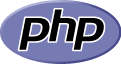
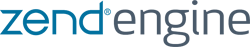
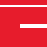
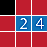

In [200]:
params = {
    'username':'아무개',
    'password':'password'
}

resp = request('POST', urljoin(url, form.attrs['action']),data=params)
resp.status_code, resp.text

In [ ]:
Cookie vs. Session
# LMS에 자동으로 로그인을 해볼 것이다.
# 스크롤러와 크롤러 수집해서
# REST API 어떻게 악용될 수 있는지.
# Bot을 이용해서 수백개의 댓글을 달았다가, 지울 것이다. => 여론조작 봇
# 로그인하는 것이 얼마나 힘든지 보여줄 것이다.
# 내 쿠키를 활용하여 할 수 있는 다른 API
# 인스타 로그인 해볼 것이다. Graph API를 만들어서 접근해야하는데, 이 외에 다른 개구멍을 이용해서 로그인을 해볼것, 검색도